# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [144]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
    3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [145]:
df = pd.read_csv('../dataset/checker_submits.csv')
df.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [146]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [147]:
categorical_features = ['uid', 'labname']
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[categorical_features])

In [148]:
# Получаем имена колонок
column_names = ohe.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=column_names)
encoded_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
# Объединяем закодированные колонки с исходным DataFrame
new_df = df.join(encoded_df)
new_df

,uid,labname,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,user_4,project1,1,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,user_4,project1,2,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,user_4,project1,3,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,user_4,project1,4,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,user_4,project1,5,5,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,user_19,laba06s,9,20,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,user_1,laba06s,6,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,user_1,laba06s,7,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,user_1,laba06s,8,20,3,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [150]:
# Удаляем первоначальные категориальные колонки
new_df = new_df.drop(columns=categorical_features)
new_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
# 4. Стандартизация числовых признаков
numerical_features = ['numTrials', 'hour']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df[numerical_features])
# Замещаем старые числовые колонки на стандартизированные
new_df[numerical_features] = scaled_data

# 5. Сохранение DataFrame в файл
new_df.to_csv('../dataset/dayofweek.csv', index=False)

In [152]:
new_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [153]:
y = new_df['dayofweek']
more = np.array([np.argmax(np.bincount(y))] * len(y))
accuracy_score(y, more)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [154]:
X = new_df.drop('dayofweek', axis=1)
y = new_df['dayofweek']
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X,y)
pred = lr.predict(X)
accuracy_score(y, pred)

0.6405693950177936

In [155]:
pd.DataFrame(lr.coef_)


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.029706,0.060742,0.887855,-0.722041,-1.209618,-0.135506,0.118553,-0.242924,0.993158,-0.574370,...,0.887855,0.559050,0.560158,-0.343194,0.050205,-0.523393,-1.747894,-0.422551,-0.803889,0.227731
1,0.520633,-0.322071,-0.092215,-0.754495,0.478224,-0.071531,0.045304,1.872677,1.070649,-0.348605,...,-0.092215,-0.067600,-0.060694,-0.008029,0.005080,-0.754884,-1.235137,1.754113,1.382146,0.492415
2,0.644720,0.543219,-0.102669,-0.553443,1.531979,-0.179436,-0.437954,-0.789167,-1.999897,-0.422269,...,-0.102669,-0.026437,-0.023188,-0.512791,-0.187417,0.076019,-0.765157,-0.923292,1.650270,-0.089549
3,0.847089,-0.148051,-0.077951,2.079764,0.978925,-0.263650,0.122552,-1.066014,-1.895669,0.836701,...,-0.077951,-0.109452,-0.093234,-0.874854,-0.628207,0.140535,0.702804,0.579607,1.395373,1.677414
4,-0.808451,0.040166,-0.220369,-0.587152,-0.347626,-0.525120,-1.192528,-1.019025,-0.982025,-0.450843,...,-0.220369,-0.063324,-0.071402,-0.897463,-1.231017,-0.879798,0.822831,-1.679946,-1.985332,-0.784483
5,-0.795752,-0.019169,-0.219953,-0.648729,0.075317,-0.936193,-0.917360,0.513349,2.461771,-0.045063,...,-0.219953,-0.038542,-0.043516,0.395595,1.182763,0.067202,1.903114,-0.879109,-1.470127,-1.268375
6,-0.378532,-0.154836,-0.174698,1.186094,-1.507200,2.111436,2.261434,0.731104,0.352012,1.004449,...,-0.174698,-0.253694,-0.268123,2.240736,0.808592,1.874319,0.319439,1.571178,-0.168442,-0.255154


In [156]:
def plot_features(coefs, features, n=10):
    fig, ax = plt.subplots(figsize=(15, 8)) # определяем параметры графика
    coefs /= coefs.sum() # коэффициенты берем с удельным весом
    indices = coefs.argsort()[::-1][:n] # индексами берем фичи (аргументы коэффициентов регрессии), отсортированные по возрастанию, поэтому срез с конца, последние n
    ax.barh(np.arange(n), coefs[indices])
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(features[indices])
    ax.invert_yaxis() # сделаем, чтобы более значимые фичи были сверху
    plt.show()

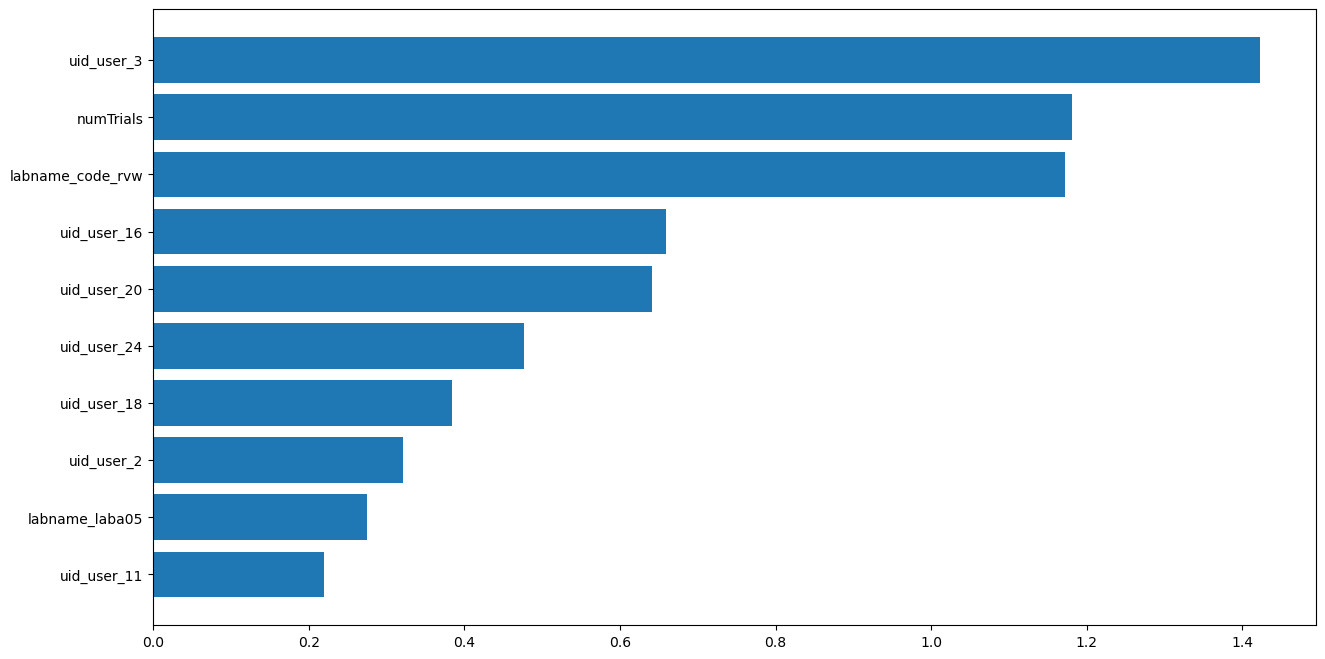

In [157]:
plot_features(lr.coef_.mean(axis=0), X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [158]:
X = new_df.drop('dayofweek', axis = 1)
y = new_df['dayofweek']
svc_m = SVC(kernel='linear', probability=True, random_state=21)
svc_m.fit(X,y)
pred = svc_m.predict(X)
accuracy_score(y,pred)

0.702846975088968

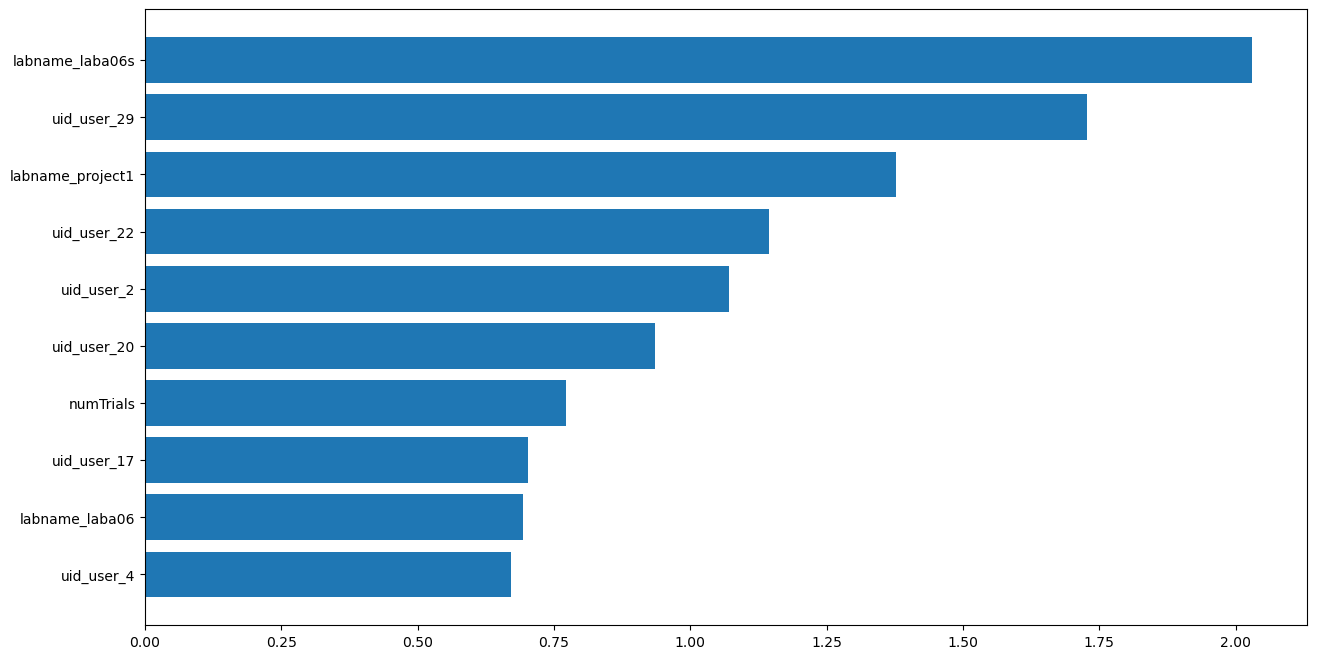

In [159]:
plot_features(svc_m.coef_.mean(axis=0), X.columns)

In [160]:
svc = SVC(probability=True, random_state=21)
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svc, param_grid, scoring='accuracy')
gs.fit(X,y)
gs.best_params_

{'kernel': 'poly'}

In [161]:
pred = gs.predict(X)
accuracy_score(y,pred)

0.8594306049822064

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [162]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=21)
dtc.fit(X,y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.5516014234875445

In [163]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)
dtc.fit(X,y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.8196915776986952

In [164]:
dtc = DecisionTreeClassifier(max_depth=21, random_state=21)
dtc.fit(X,y)
pred = dtc.predict(X)
accuracy_score(y, pred)

0.9905100830367735

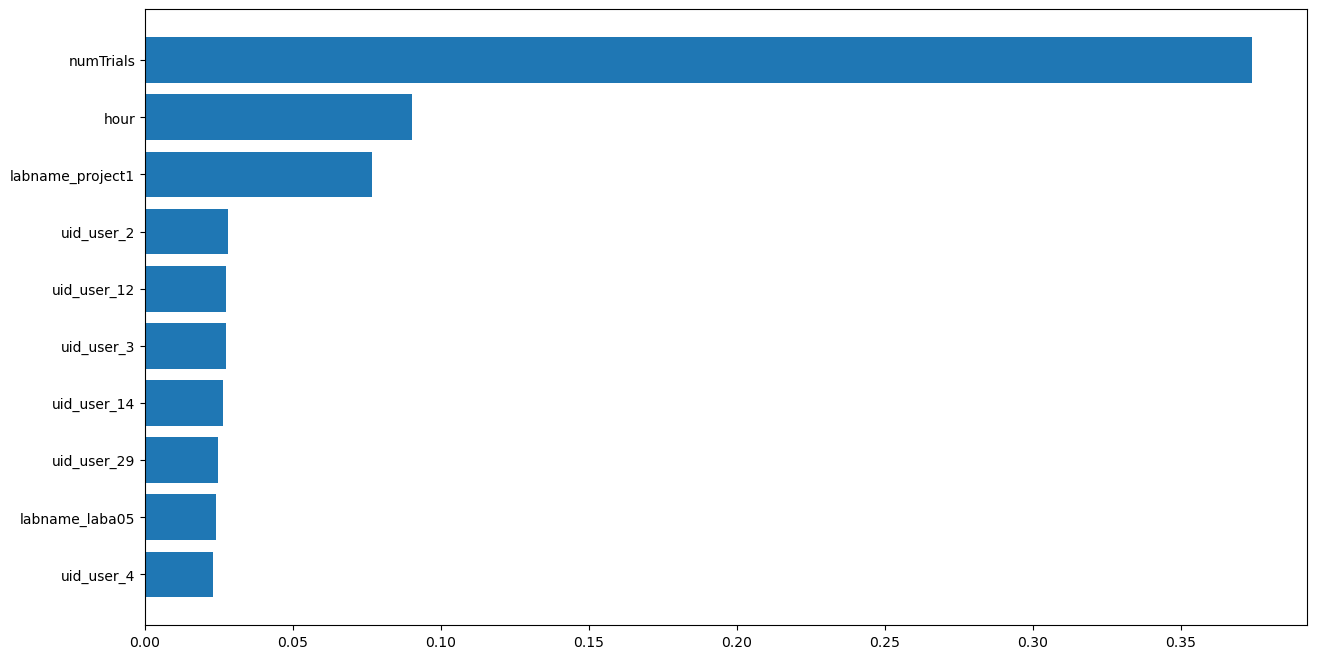

In [165]:
plot_features(dtc.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [166]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=21)
rfc.fit(X, y)
pred = rfc.predict(X)
accuracy_score(y, pred)

0.8701067615658363

In [167]:
rfc = RandomForestClassifier(n_estimators=111, max_depth=1, random_state=21)
rfc.fit(X, y)
pred = rfc.predict(X)
accuracy_score(y, pred)

0.38730723606168443

In [168]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rfc.fit(X, y)
pred = rfc.predict(X)
accuracy_score(y, pred)

1.0

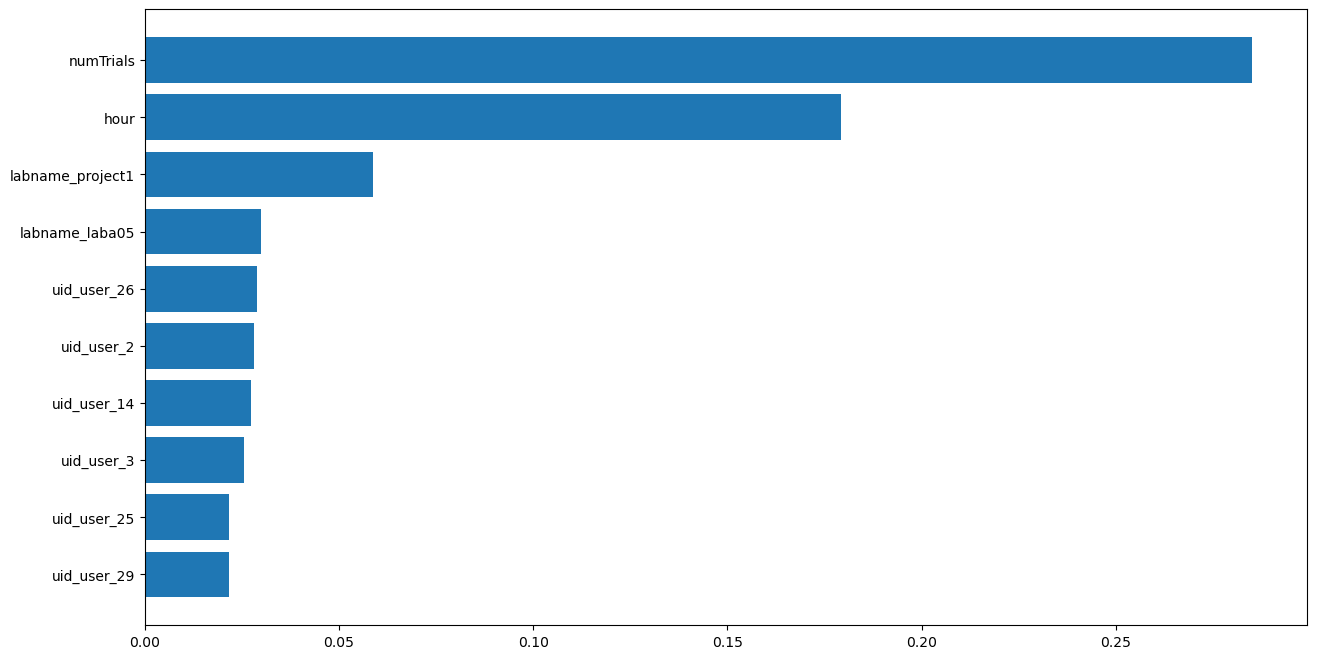

In [169]:
plot_features(rfc.feature_importances_, X.columns)